<a href="https://colab.research.google.com/github/beriaacan/Personal-Projects/blob/main/Gaussian%20Naive%20Bayes/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naive Bayes
Naive Bayes algoritması iki veya daha fazla sınıfın sınıflandırılmasında görev alır. Bu model öğrenmek için Bayes Teoremi’nden faydalanır. Naive Bayes modeli bir koşullu bağımsızlık (conditional independence) varsayımı yapar. Bu varsayıma göre her özellik (feature) bağımsız olarak ele alınır. Her ne kadar bu varsayım çoğu zaman veriler adına gerçeği yansıtmasa da bu varsayımla birlikte tahmin edilecek parametre sayısı oldukça düşer. Naive Bayes algoritması bu varsayımın geçerli olmadığı verilerde şaşırtıcı derecede iyi sonuçlar verebilir.





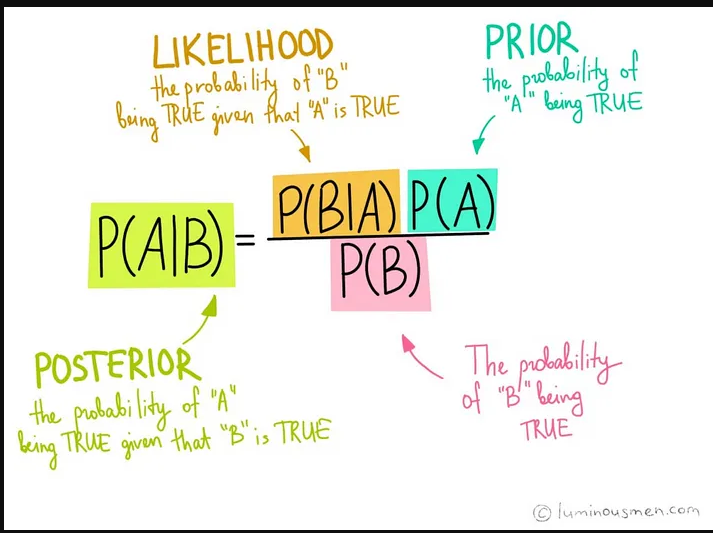

Naive Bayes modelinin çalışabilmesi için olasılık değerleri hesaplanır. Bunlar eğitim veri kümesindeki (training dataset) her sınıfın olasılıkları (Class Probabilities) ve her bir sınıf değerinin verildiği her girdi değerinin koşullu olasılıklarıdır (Conditional Probabilities).

Buna ek olarak, Naive Bayes modeli eğitim verisi (training data) ile hızlı bir şekilde öğrenebilir. Çünkü bu yöntemde katsayıların optimize edilmesi gerekmez. Özetle, Bir Naive Bayes modeli verildiğinde Bayes Teoremi kullanılarak yeni veriler adına tahminler yapılabilir.

Naive Bayes’in Artıları ve Eksileri


Artılar :

•Her özellik birbirinden bağımsız kabul edildiği için Logistic Regresyon gibi modellerden daha iyi performans gösterir.

•Basit ve kolay uygulanabilir.

•Az veriyle iyi işler başarabilir.

•Devamlı ve kesik(Continuous and discrete) veriler ile kullanılabilir.

•Dengesiz veri setinde de kullanılabilir.***

•Yüksek boyutlu verilerde(High Dimension Data) iyi çalışabilir.

•Hızlı olmasından dolayı gerçek zamanlı sistemlerde kullanılabilir.

•Alakasız özelliklerle ilişkiye girmemektedir.

Eksiler:

•Gerçek hayatta her özellik bir noktada birbirine bağımlıdır.

•Değişkenler arası ilişkiler modellenemez çünkü özellikler birbirinden bağımsız varsayılarak işlemler yapılır.

•Zero Probability problemi ile karşı karşıya kalabilirsiniz. Zero Probability istediğimiz örneğin veri setinde hiç bulunmaması durumudur. Yani herhangi bir işleme sokulduğunda sonucu 0 yapacaktır. Bunun için en basit yöntem tüm verilere minimum değer ekleyerek(genellikle 1) bu olasılığı ortadan kaldırabilirsiniz.





#Naive Bayes Türleri

Gaussian Naive Bayes: Eğer özelliklerimiz sürekli değer(continuous value) ise bu değerlerin bir gauss dağılımı veya diğer bir değişle normal dağılımdan örneklendiğini varsayıyoruz.

Multinominal Naive Bayes: Örneğin bir e-ticaret siteniz varsa pek çok kategoriniz olur. Çok sınıflı kategorileri -spor, kozmetik, giyim, petshop- sınıflandırmak için kullanılır.

Bernoulli Naive Bayes: Multinominal Naive Bayes’e benzer şekilde sınıflandırma yapar. Ancak tahminler sadece boolean(ikili) şekildedir. Evet/Hayır, Spam/Spam Değil, 1/0, Var/Yok gibi.

https://medium.com/kaveai/naive-bayes-ve-uygulamaları-d7d5a56c689b


In [59]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import pandas as pd

def load_csv(dosya_yolu):
    veri_seti = pd.read_csv(dosya_yolu)
    return veri_seti

file_path = '/content/drive/My Drive/FIZ437E(2023-2024 fall)/fiz437e_hw3/diabetes.csv'
data_set = load_csv(file_path)


In [76]:
data_set= load_csv(file_path)
data_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [77]:
import random

def split_dataset(dataset, split_ratio):
    train_size = int(len(dataset) * split_ratio)
    train_set = []
    copy = list(dataset)
    while len(train_set) < train_size:
        index = random.randrange(len(copy))
        train_set.append(copy.pop(index))
    return [train_set, copy]


In [78]:
def separate_by_class(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if vector[-1] not in separated:
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated


In [79]:
import math

def mean(numbers):
    return sum(numbers) / float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
    return math.sqrt(variance)


In [80]:
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [81]:
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = {}
    for class_value, instances in separated.items():
        summaries[class_value] = summarize(instances)
    return summaries


In [82]:
def calculate_probability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent


In [83]:
def calculate_class_probabilities(summaries, input_vector):
    probabilities = {}
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = 1
        for i in range(len(class_summaries)):
            mean, stdev = class_summaries[i]
            x = input_vector[i]
            probabilities[class_value] *= calculate_probability(x, mean, stdev)
    return probabilities


In [85]:
def predict(summaries, input_vector):
    probabilities = calculate_class_probabilities(summaries, input_vector)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label

In [86]:
def get_predictions(summaries, test_set):
    predictions = []
    for i in range(len(test_set)):
        result = predict(summaries, test_set[i])
        predictions.append(result)
    return predictions


In [87]:
def get_accuracy(test_set, predictions):
    correct = 0
    for x in range(len(test_set)):
        if test_set[x][-1] == predictions[x]:
            correct += 1
    return (correct / float(len(test_set))) * 100.0


In [88]:
split_ratio = 0.67
train_set, test_set = split_dataset(data_set.values, split_ratio)

train_set_summary = summarize_by_class(train_set)
test_predictions = get_predictions(train_set_summary, test_set)

accuracy = get_accuracy(test_set, test_predictions)
print(f'Test seti başarı oranı: {accuracy}%')


Test seti başarı oranı: 73.62204724409449%


In [89]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB


dataset = datasets.load_iris()

model = GaussianNB()
model.fit(dataset.data,dataset.target)

expected = dataset.target
predicted = model.predict(dataset.data)

print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

# Recall columns
# Precision Row

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
